In [1]:
import datetime
now = datetime.datetime.now()
print ("Current date and time : ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time : 
2022-11-07 23:39:57


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import regex as re

In [ ]:
# pos_df = pd.read_csv('data/positive_dataset.csv')
# neg_df = pd.read_csv('data/compiled_neg_data_w_lyrics.csv', header=None)
songs = pd.read_csv('final_compiled.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Combined Dataset - pre-processing

In [ ]:
songs.head(5)

Unnamed: 0                      id                      name  \
0           0  0gplL1WMoJ6iYaPgMCL0gX                Easy On Me   
1           1  4BI4iNZigfF4SUq13TcFPh  INDUSTRY BABY - EXTENDED   
2           2  58UKC45GPNTflCN6nwCUeF                Fancy Like   
3           3  3rmo8F54jFF8OgYsqTxm5d                Bad Habits   
4           4  50nfwKoDiSYg8zOCREWAm5                   Shivers   

                        artists  \
0                     ['Adele']   
1  ['Lil Nas X', 'Jack Harlow']   
2              ['Walker Hayes']   
3                ['Ed Sheeran']   
4                ['Ed Sheeran']   

                                          artist_ids  track_number  \
0                         ['4dpARuHxo51G3z768sgnrY']             1   
1  ['7jVv8c5Fj3E9VhNjxT4snq', '2LIk90788K0zvyj2JJ...             2   
2                         ['7sKxqpSqbIzphAKAhrqvlf']             6   
3                         ['6eUKZXaKkcviH0Ku9w2n3V']             4   
4                         ['6eUKZXaKkcviH0Ku9w2n3V']             2   

   danceability  energy  key  loudness  ...  liveness  valence    tempo  \
0         0.604   0.366    5    -7.519  ...    0.1330    0.130  141.981   
1         0.732   0.708   10    -6.775  ...    0.0528    0.883  149.988   
2         0.647   0.765    1    -6.459  ...    0.3150    0.855   79.994   
3         0.807   0.893   11    -3.745  ...    0.3660    0.537  126.011   
4         0.788   0.859    2    -2.724  ...    0.0424    0.822  141.020   

   explicit  duration_ms     date  release_date  \
0     False       224695  6/11/21           NaN   
1      True       227200  6/11/21           NaN   
2     False       161853  6/11/21           NaN   
3     False       230747  6/11/21           NaN   
4     False       207853  6/11/21           NaN   

                                              genres  \
0      ['pop soul', 'pop', 'british soul', 'uk pop']   
1  ['deep underground hip hop', 'lgbtq+ hip hop',...   
2  ['modern country rock', 'contemporary country'...   
3                                  ['pop', 'uk pop']   
4                                  ['pop', 'uk pop']   

                                              lyrics target  
0   .There ain't no gold in this river .That I've...      1  
1   .(D-D-Daytrip took it to ten, hey) .Baby back...      1  
2   .Ayy .My girl is bangin', she's so low mainte...      1  
3   .(One, two, three, four) .Ooh, ooh . .Every t...      1  
4   .I took an arrow to the heart .I never kissed...      1  

[5 rows x 24 columns]

In [ ]:
songs.columns

Index(['Unnamed: 0', 'id', 'name', 'artists', 'artist_ids', 'track_number',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'explicit', 'duration_ms', 'date', 'release_date', 'genres', 'lyrics',
       'target'],
      dtype='object')

In [ ]:
# Parse artists 
unwanted = "[]'"
songs['artists'] = songs['artists'].apply(lambda x: ''.join(c for c in x if c not in unwanted)) # remove [],''


In [ ]:
pos_dataset['release_date'] = pd.to_datetime(pos_dataset['release_date'])

<ipython-input-165-a946d4403a6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_dataset['release_date'] = pd.to_datetime(pos_dataset['release_date'])


In [ ]:
pos_dataset['Year'] = pos_dataset['release_date'].apply(lambda x: x.year)

<ipython-input-170-a60fb899e7e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_dataset['Year'] = pos_dataset['release_date'].apply(lambda x: x.year)


In [ ]:
df_pre90 = pos_dataset[pos_dataset.Year <= 1990]
df_post_90 = pos_dataset[pos_dataset.Year > 1990]

In [ ]:
def minutes_seconds(x):
    to_seconds = x/1000
    to_minutes = to_seconds/60
    return to_minutes

In [ ]:
# pos_dataset['duration_minutes'] = pos_dataset['duration_ms'].apply(minutes_seconds)
neg_dataset['duration_minutes'] = neg_dataset['duration_ms'].apply(minutes_seconds)

<ipython-input-215-5ddda4f2ee62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg_dataset['duration_minutes'] = neg_dataset['duration_ms'].apply(minutes_seconds)


In [ ]:
neg_dataset = songs[songs['target'] == 0]

### Positive Dataset

Mood: Danceability, Valence, Energy, Tempo
<br> Properties: Loudness, Speechiness, Instrumentalness
<br> Context: Liveness, Acousticness

In [ ]:
audio_features=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'valence', 'liveness', 'instrumentalness', 'tempo', 'duration_minutes']

In [ ]:
pos_dataset.corr()

track_number  danceability    energy       key  loudness  \
track_number          1.000000     -0.005436 -0.100034  0.006550 -0.057450   
danceability         -0.005436      1.000000 -0.015987  0.022201  0.054196   
energy               -0.100034     -0.015987  1.000000  0.034003  0.727246   
key                   0.006550      0.022201  0.034003  1.000000  0.024170   
loudness             -0.057450      0.054196  0.727246  0.024170  1.000000   
mode                 -0.024082     -0.139882 -0.020161 -0.148540 -0.018044   
speechiness           0.033737      0.254503 -0.010114  0.028014 -0.038724   
acousticness          0.077672     -0.175148 -0.582666 -0.010421 -0.488982   
instrumentalness     -0.013512     -0.044705 -0.177988 -0.005565 -0.371499   
liveness              0.004323     -0.076768  0.158498  0.000322  0.084013   
valence              -0.050633      0.321427  0.398183  0.046965  0.263143   
tempo                -0.006258     -0.145494  0.113515 -0.000540  0.092120   
explicit              0.072184      0.343940 -0.058159  0.011723  0.001711   
duration_ms           0.045629     -0.146117  0.034176 -0.011563  0.039408   
target                     NaN           NaN       NaN       NaN       NaN   

                      mode  speechiness  acousticness  instrumentalness  \
track_number     -0.024082     0.033737      0.077672         -0.013512   
danceability     -0.139882     0.254503     -0.175148         -0.044705   
energy           -0.020161    -0.010114     -0.582666         -0.177988   
key              -0.148540     0.028014     -0.010421         -0.005565   
loudness         -0.018044    -0.038724     -0.488982         -0.371499   
mode              1.000000    -0.123591      0.037361         -0.015969   
speechiness      -0.123591     1.000000     -0.069840         -0.063896   
acousticness      0.037361    -0.069840      1.000000          0.168744   
instrumentalness -0.015969    -0.063896      0.168744          1.000000   
liveness          0.001478     0.107720     -0.081064         -0.006316   
valence          -0.037422     0.049981     -0.175346         -0.093165   
tempo             0.030502     0.054145     -0.093863         -0.007953   
explicit         -0.141934     0.511267     -0.099347         -0.093075   
duration_ms       0.004167    -0.061184     -0.039982         -0.047497   
target                 NaN          NaN           NaN               NaN   

                  liveness   valence     tempo  explicit  duration_ms  target  
track_number      0.004323 -0.050633 -0.006258  0.072184     0.045629     NaN  
danceability     -0.076768  0.321427 -0.145494  0.343940    -0.146117     NaN  
energy            0.158498  0.398183  0.113515 -0.058159     0.034176     NaN  
key               0.000322  0.046965 -0.000540  0.011723    -0.011563     NaN  
loudness          0.084013  0.263143  0.092120  0.001711     0.039408     NaN  
mode              0.001478 -0.037422  0.030502 -0.141934     0.004167     NaN  
speechiness       0.107720  0.049981  0.054145  0.511267    -0.061184     NaN  
acousticness     -0.081064 -0.175346 -0.093863 -0.099347    -0.039982     NaN  
instrumentalness -0.006316 -0.093165 -0.007953 -0.093075    -0.047497     NaN  
liveness          1.000000  0.034833  0.014964  0.053915     0.021173     NaN  
valence           0.034833  1.000000  0.010199 -0.063264    -0.108471     NaN  
tempo             0.014964  0.010199  1.000000  0.010361    -0.032148     NaN  
explicit          0.053915 -0.063264  0.010361  1.000000    -0.060101     NaN  
duration_ms       0.021173 -0.108471 -0.032148 -0.060101     1.000000     NaN  
target                 NaN       NaN       NaN       NaN          NaN     NaN

Pearson correlation coefficient: a measure of the linear association between two variables. 

It has a value between -1 and 1 where:
- -1 indicates a perfectly negative linear correlation between two variables
- 0 indicates no linear correlation between two variables
- 1 indicates a perfectly positive linear correlation between two variables

<AxesSubplot:>

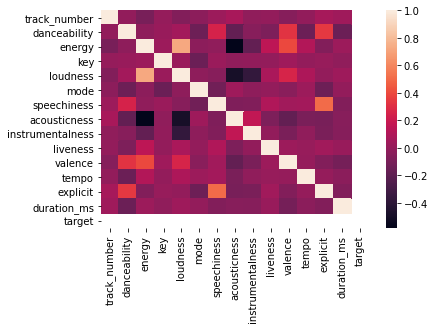

In [ ]:
sns.heatmap(pos_dataset.corr())

- High positive linear correlation between loudness and energy
- Moderately high positive linear correlation between explicit and speechiness 


<AxesSubplot:>

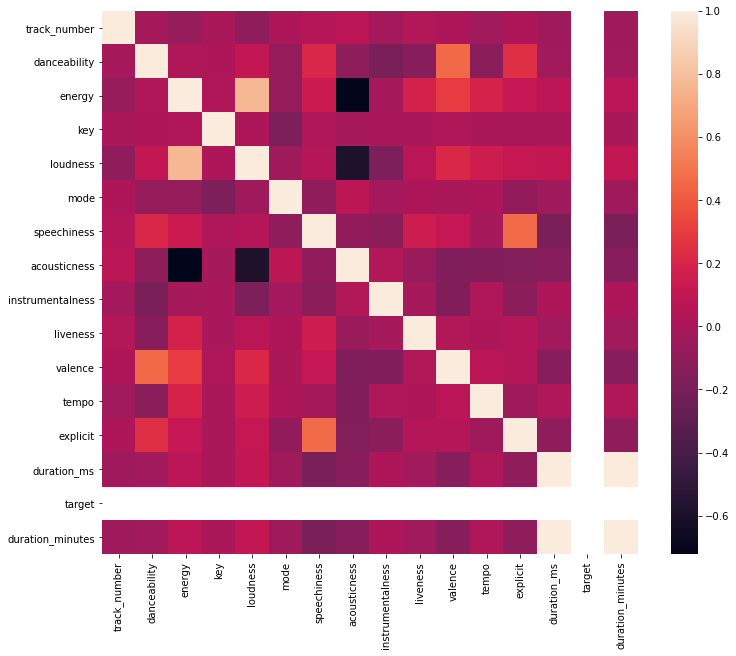

In [ ]:
sns.heatmap(neg_dataset.corr())

In [ ]:
# Top 20 Artists with songs that have high energy
pd.DataFrame(pd.DataFrame(pos_dataset.groupby(pos_dataset['artists']).filter(lambda x: len(x)>10)).groupby("artists").energy.mean()).sort_values(by='energy',ascending=False)[:20]

energy
artists                       
Hannah Montana        0.889455
Fall Out Boy          0.886222
Florida Georgia Line  0.882750
Nickelback            0.855737
Linkin Park           0.851333
5 Seconds of Summer   0.823818
Luke Bryan            0.822241
Avril Lavigne         0.808474
Lady A                0.798529
JAY-Z                 0.795429
Madonna               0.783077
Jake Owen             0.779857
Justin Moore          0.778417
Jonas Brothers        0.769278
T.I.                  0.769250
Black Eyed Peas       0.765800
Trace Adkins          0.763923
50 Cent               0.762615
Jennifer Lopez        0.762375
Jason Aldean          0.761167

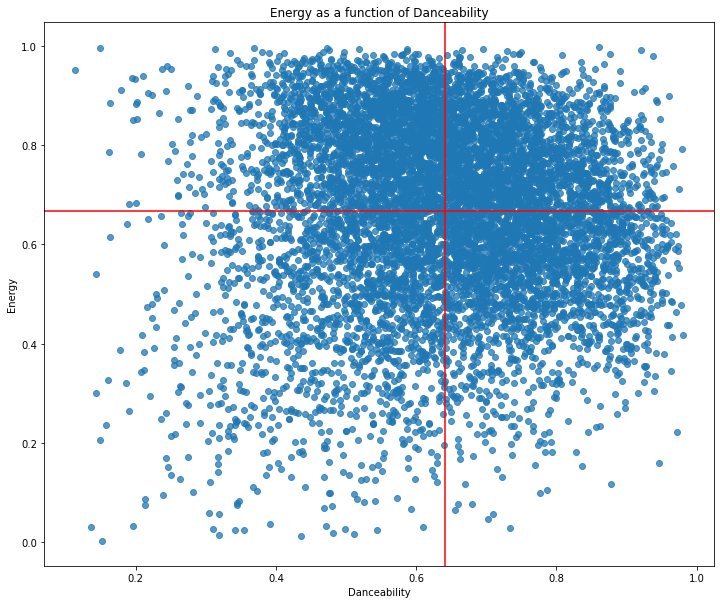

In [ ]:
plt.rcParams["figure.figsize"] = (12,10)

average_noise = pos_dataset['energy'].mean()
average_danceability = pos_dataset['danceability'].mean()
plt.scatter(pos_dataset['danceability'],pos_dataset['energy'],alpha=0.75)
plt.axhline(y=average_noise, color='r')
plt.axvline(x=average_danceability, color='r')
plt.title("Energy as a function of Danceability")
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.show()

In [ ]:
pos_dataset.columns

Index(['id', 'name', 'artists', 'artist_ids', 'track_number', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'explicit',
       'duration_ms', 'date', 'release_date', 'genres', 'lyrics', 'target'],
      dtype='object')

In [ ]:
import random
from random import randint

# randomly sample songs from sample
already_picked = []
for i in range(250):
    value = randint(0,57376)
    already_picked.append(value)

df = pd.DataFrame(columns=['explicit', 'danceability', 'energy', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'target'])
for i in already_picked:  
    df = df.append({'explicit':songs.iloc[i, 16], 'danceability':songs.iloc[i, 5], 'energy':songs.iloc[i, 6], 'mode':songs.iloc[i, 9], 'speechiness':songs.iloc[i, 10], 'acousticness':songs.iloc[i, 11], 'instrumentalness':songs.iloc[i, 12], 'liveness':songs.iloc[i, 13], 'valence':songs.iloc[i, 14], 'target':songs.iloc[i,-1] }, ignore_index=True)  

In [ ]:
df[df['target'] == 0]

explicit  danceability  energy mode  speechiness  acousticness  \
0      False         0.531   0.410    1       0.0302      0.801000   
1      False         0.176   0.927    1       0.0954      0.000559   
2      False         0.267   0.332    1       0.0305      0.311000   
3      False         0.396   0.481    1       0.0395      0.575000   
4      False         0.879   0.447    1       0.0499      0.401000   
..       ...           ...     ...  ...          ...           ...   
245    False         0.529   0.713    1       0.0367      0.084500   
246    False         0.794   0.664    1       0.0323      0.376000   
247    False         0.687   0.571    0       0.5100      0.593000   
248     True         0.789   0.669    1       0.4010      0.629000   
249    False         0.484   0.917    0       0.0640      0.003850   

     instrumentalness  liveness  valence target  
0            0.230000    0.1120    0.337      0  
1            0.000118    0.1980    0.227      0  
2            0.000379    0.1980    0.282      0  
3            0.932000    0.2470    0.081      0  
4            0.000000    0.1270    0.646      0  
..                ...       ...      ...    ...  
245          0.000039    0.3420    0.927      0  
246          0.000225    0.0865    0.862      0  
247          0.000000    0.2480    0.899      0  
248          0.000000    0.3510    0.415      0  
249          0.117000    0.3210    0.685      0  

[210 rows x 10 columns]

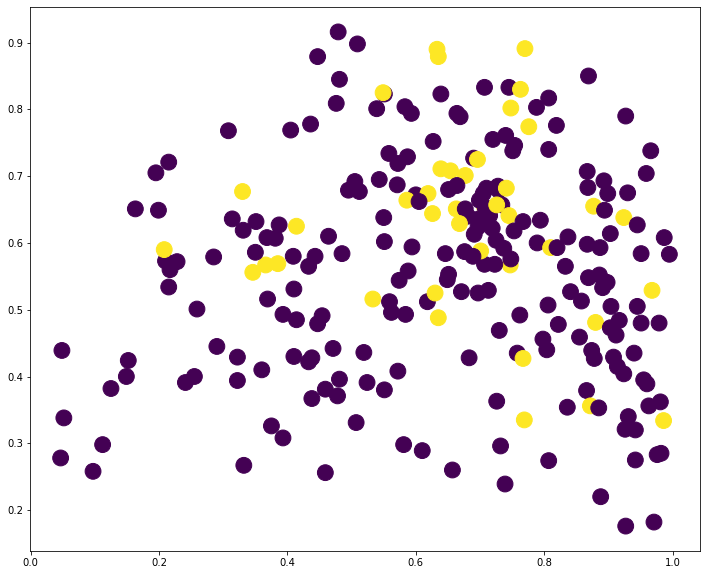

In [ ]:
# plot of energy against dancibility for randomly sampled songs 
# purple = not hit song, yellow = hit song

plt.scatter(df.energy, df.danceability, s=250, c=df.target)

More graphs

(array([1.740e+02, 4.583e+03, 3.572e+03, 2.370e+02, 3.000e+01, 1.000e+01,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ 0.51613333,  2.11812   ,  3.72010667,  5.32209333,  6.92408   ,
         8.52606667, 10.12805333, 11.73004   , 13.33202667, 14.93401333,
        16.536     ]),
 <BarContainer object of 10 artists>)

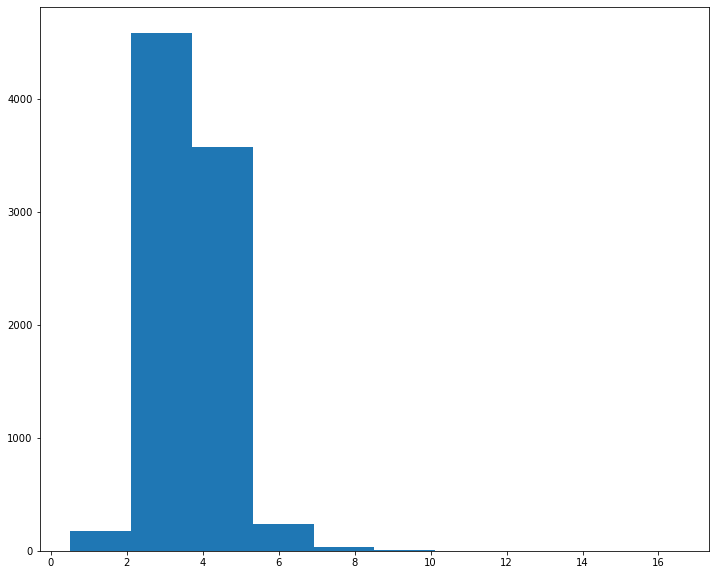

In [ ]:
# duration distribution
plt.hist(pos_dataset['duration_minutes'])

In [ ]:
pos_dataset['key'].unique()

array([ 5, 10,  1, 11,  2,  9,  0,  8,  3,  6,  7,  4])

In [ ]:
pos_dataset['artists'].unique()

array(['Adele', 'Lil Nas X, Jack Harlow', 'Walker Hayes', ...,
       'Tha Eastsidaz, Jayo Felony, Sylk E. Fine', 'Dr. Dre, Eminem',
       'Kevon Edmonds'], dtype=object)

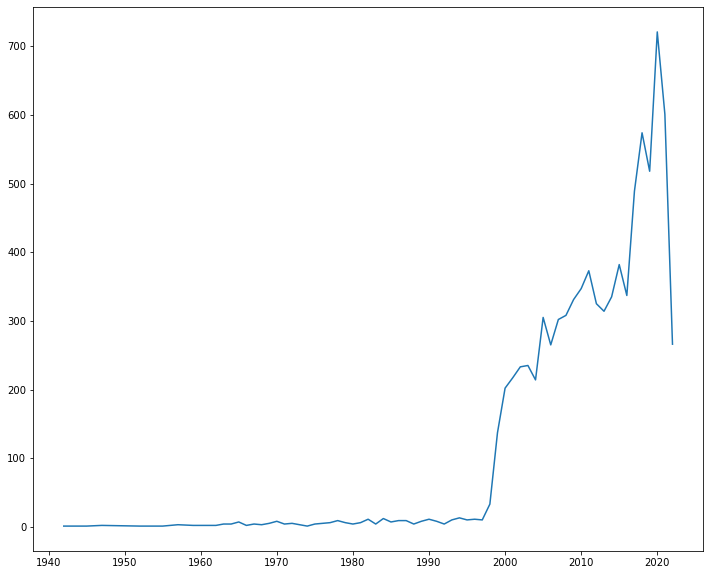

In [ ]:
y = pos_dataset.groupby(['Year']).count()['id'].values
plt.plot(pos_dataset.groupby(['Year']).count().index, y)

<AxesSubplot:>

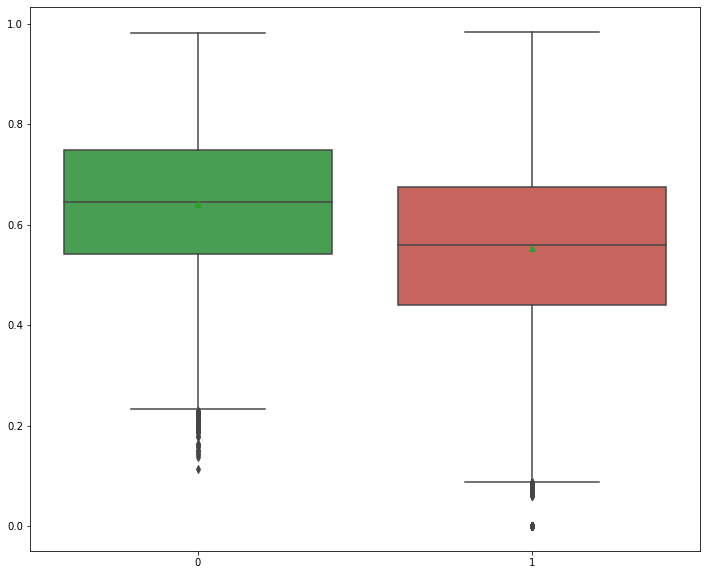

In [ ]:
# Boxplots for each audio feature 
# pos_dataset['danceability'].plot(kind='box', title='Boxplot of Danceability of Hit Songs')

# green = pos dataset, red is neg dataset
sns.boxplot(
    data = [pos_dataset['danceability'], neg_dataset['danceability']],
    palette=[sns.xkcd_rgb["medium green"], sns.xkcd_rgb["pale red"]],
    showmeans=True
)

<AxesSubplot:>

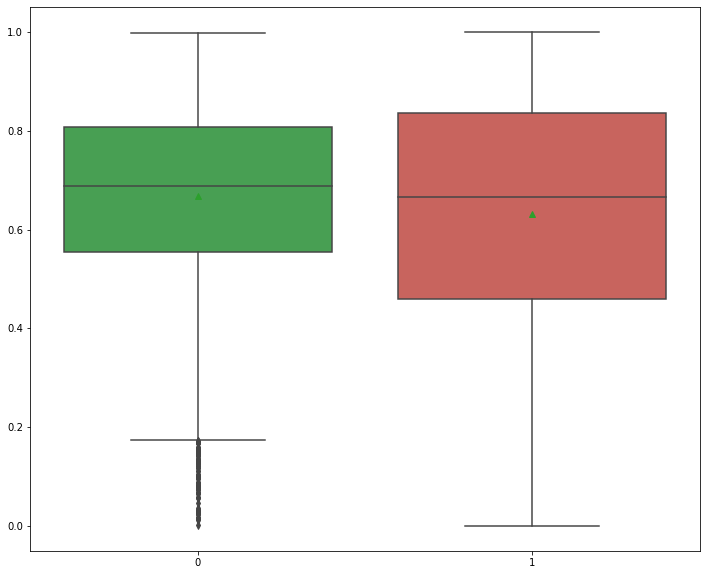

In [ ]:
# pos_dataset['energy'].plot(kind='box', title='Boxplot of Energy of Hit Songs')

# green = pos dataset, red is neg dataset
sns.boxplot(
    data = [pos_dataset['energy'], neg_dataset['energy']],
    palette=[sns.xkcd_rgb["medium green"], sns.xkcd_rgb["pale red"]],
    showmeans=True
)

<AxesSubplot:title={'center':'Boxplot of Key of Hit Songs'}>

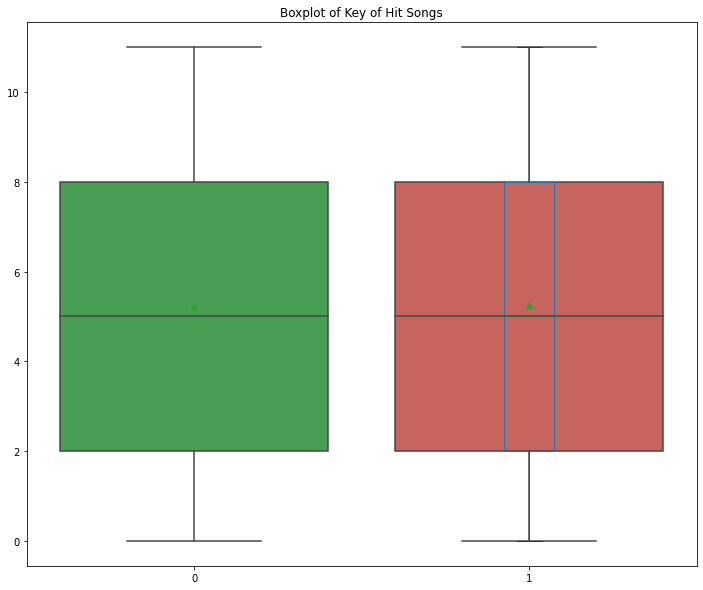

In [ ]:
pos_dataset['key'].plot(kind='box', title='Boxplot of Key of Hit Songs')

# green = pos dataset, red is neg dataset
sns.boxplot(
    data = [pos_dataset['key'], neg_dataset['key']],
    palette=[sns.xkcd_rgb["medium green"], sns.xkcd_rgb["pale red"]],
    showmeans=True
)

<AxesSubplot:>

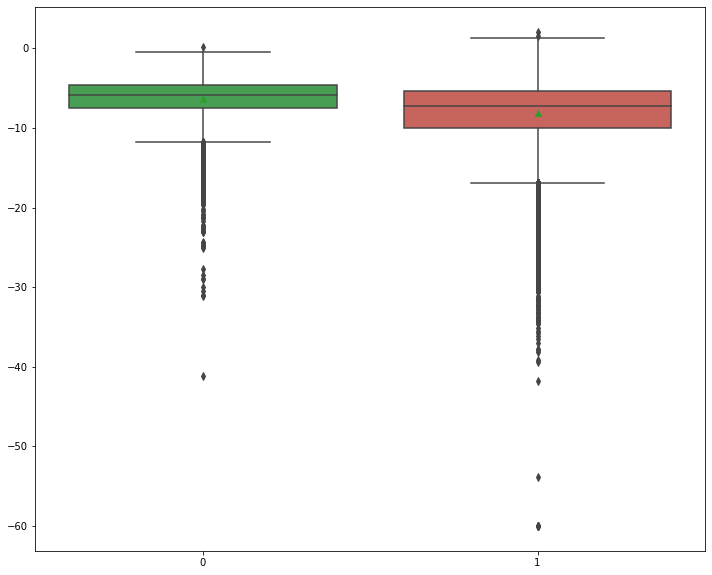

In [ ]:
# pos_dataset['loudness'].plot(kind='box', title='Boxplot of Loudness of Hit Songs')

# green = pos dataset, red is neg dataset
sns.boxplot(
    data = [pos_dataset['loudness'], neg_dataset['loudness']],
    palette=[sns.xkcd_rgb["medium green"], sns.xkcd_rgb["pale red"]],
    showmeans=True
)

<AxesSubplot:>

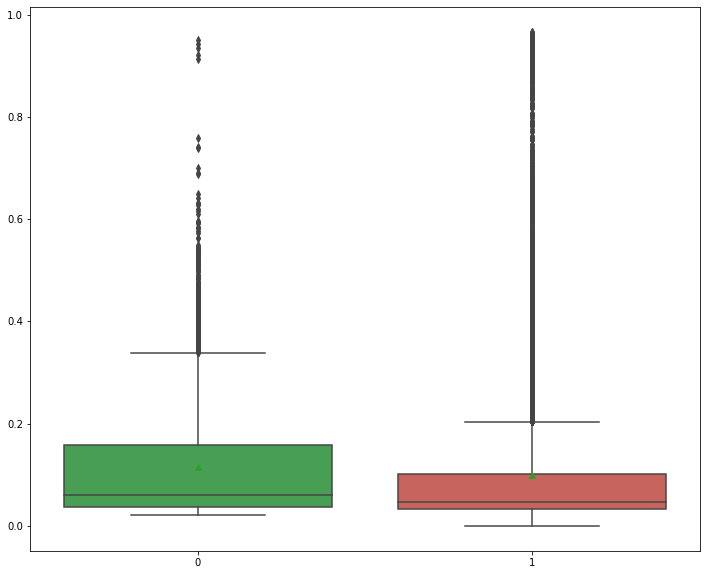

In [ ]:
# pos_dataset['speechiness'].plot(kind='box', title='Boxplot of Speechiness of Hit Songs')

# green = pos dataset, red is neg dataset
sns.boxplot(
    data = [pos_dataset['speechiness'], neg_dataset['speechiness']],
    palette=[sns.xkcd_rgb["medium green"], sns.xkcd_rgb["pale red"]],
    showmeans=True
)

<AxesSubplot:>

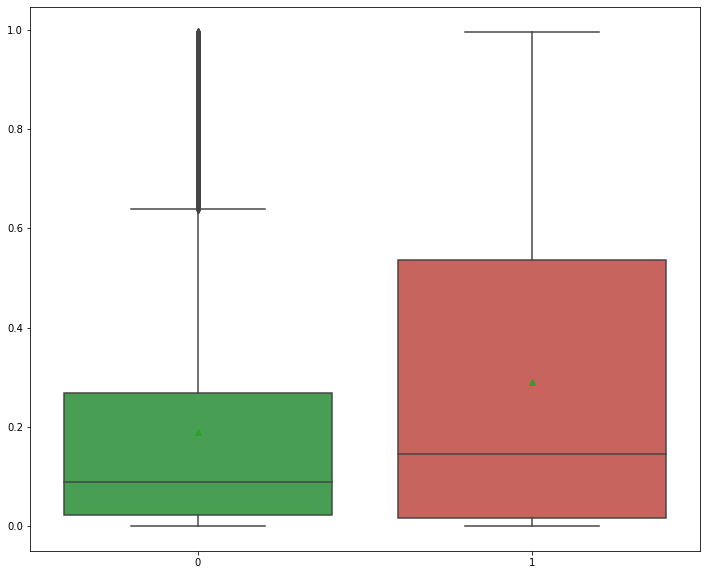

In [ ]:
# pos_dataset['acousticness'].plot(kind='box', title='Boxplot of Acousticness of Hit Songs')

# green = pos dataset, red is neg dataset
sns.boxplot(
    data = [pos_dataset['acousticness'], neg_dataset['acousticness']],
    palette=[sns.xkcd_rgb["medium green"], sns.xkcd_rgb["pale red"]],
    showmeans=True
)

<AxesSubplot:>

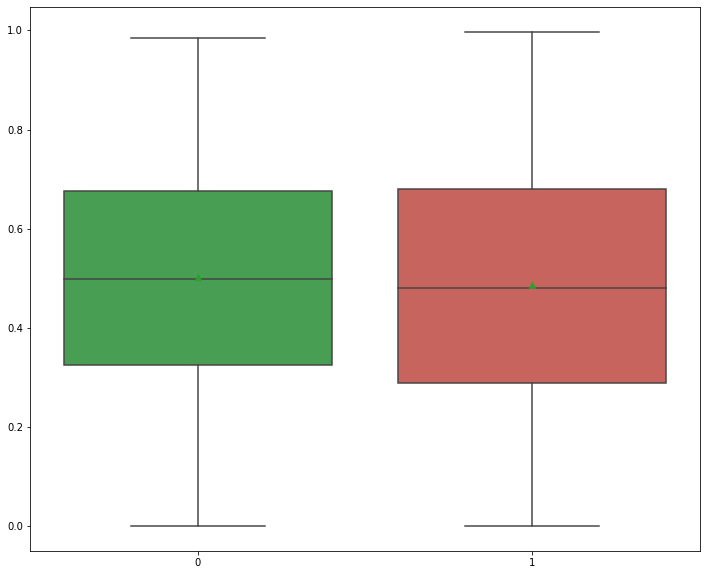

In [ ]:
# pos_dataset['valence'].plot(kind='box', title='Boxplot of Valence of Hit Songs')

# green = pos dataset, red is neg dataset
sns.boxplot(
    data = [pos_dataset['valence'], neg_dataset['valence']],
    palette=[sns.xkcd_rgb["medium green"], sns.xkcd_rgb["pale red"]],
    showmeans=True
)

<AxesSubplot:>

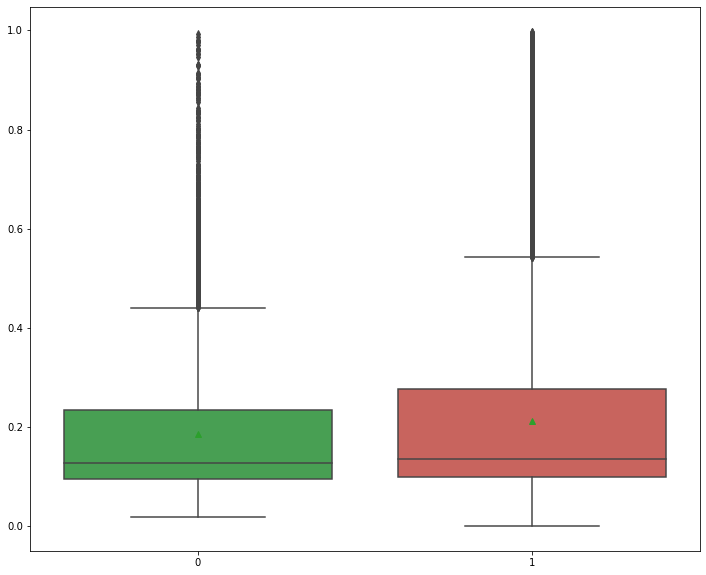

In [ ]:
# pos_dataset['liveness'].plot(kind='box', title='Boxplot of Liveness of Hit Songs')

# green = pos dataset, red is neg dataset
sns.boxplot(
    data = [pos_dataset['liveness'], neg_dataset['liveness']],
    palette=[sns.xkcd_rgb["medium green"], sns.xkcd_rgb["pale red"]],
    showmeans=True
)

<AxesSubplot:>

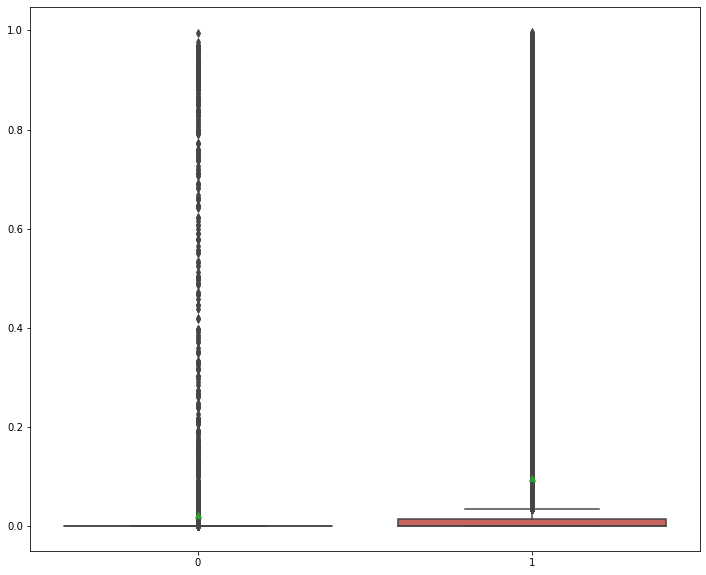

In [ ]:
# pos_dataset['instrumentalness'].plot(kind='box', title='Boxplot of Instrumentalness of Hit Songs')

# green = pos dataset, red is neg dataset
sns.boxplot(
    data = [pos_dataset['instrumentalness'], neg_dataset['instrumentalness']],
    palette=[sns.xkcd_rgb["medium green"], sns.xkcd_rgb["pale red"]],
    showmeans=True
)

<AxesSubplot:>

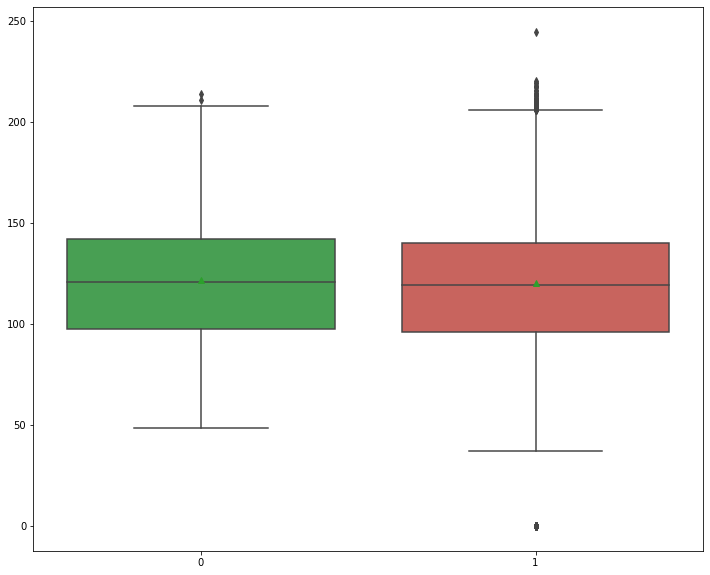

In [ ]:
# pos_dataset['tempo'].plot(kind='box', title='Boxplot of Tempo of Hit Songs')

# green = pos dataset, red is neg dataset
sns.boxplot(
    data = [pos_dataset['tempo'], neg_dataset['tempo']],
    palette=[sns.xkcd_rgb["medium green"], sns.xkcd_rgb["pale red"]],
    showmeans=True
)

<AxesSubplot:>

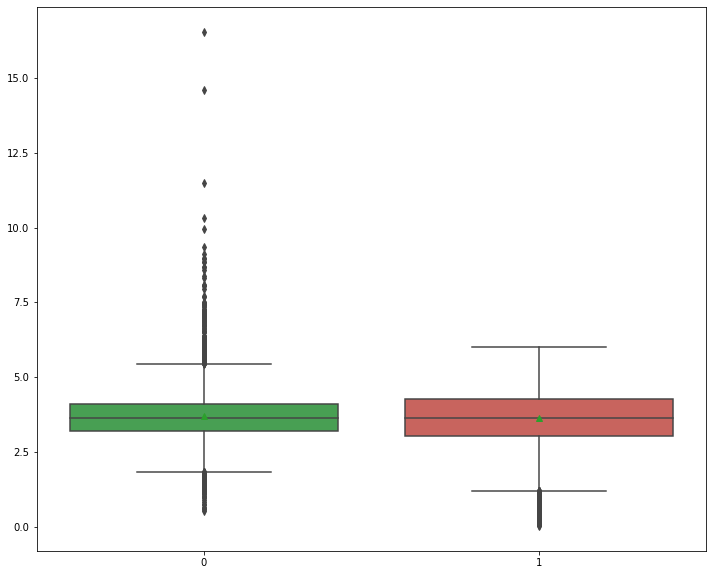

In [ ]:
# pos_dataset['duration_minutes'].plot(kind='box', title='Boxplot of Duration (minutes) of Hit Songs')

# green = pos dataset, red is neg dataset
sns.boxplot(
    data = [pos_dataset['duration_minutes'], neg_dataset['duration_minutes']],
    palette=[sns.xkcd_rgb["medium green"], sns.xkcd_rgb["pale red"]],
    showmeans=True
)

### Merged dataset with artists.csv

In [ ]:
# merge with artists dataset 
artists = pd.read_csv('data/artists.csv')

In [ ]:
songs_with_artist_popularity = pd.merge(left=pos_dataset, right=artists, left_on='artists', right_on='name', how='left')

In [ ]:
songs_with_artist_popularity.rename({'id_y' : 'artist_idy', 'id_x' : 'song_id', 'name_x' : 'song_name', 'name_y' : 'artist_name'}, axis = 1, inplace=True)

In [ ]:
songs_with_artist_popularity.drop(columns='genres_y', inplace=True)

In [ ]:
songs_with_artist_popularity[songs_with_artist_popularity['popularity'] != 0 ].sort_values(by='popularity', ascending=False)

song_id             song_name        artists  \
2867  4yWCzA44dQyp0SoeM81bUb  Life Is Worth Living  Justin Bieber   
3753  30Co9eN7JHPf1i2wEyVSMJ       Nothing Like Us  Justin Bieber   
3439  6CLVh9sekZ1p2G8Tfhhj8h      All That Matters  Justin Bieber   
433   3rLIv187BhjyweFe89SgLn      Somebody To Love  Justin Bieber   
431   5NU40QTlXrDUJzDBdv79bg           Deserve You  Justin Bieber   
...                      ...                   ...            ...   
1888  4LiMQ6G9n84rDUBs9wtwz6        Singles You Up   Jordan Davis   
3183  7hxZF4jETnE5Q75rKQnMjE       I Walk the Line    Johnny Cash   
1448  3dCZm5HrG0jIXAHfNkg2H0       Take It From Me   Jordan Davis   
1375  5WHTFyqSii0lmT9R21abT8      Don't Call Me Up          Mabel   
6009  3g6SuyjGaGyAXmjvdNI1IU             4 Minutes          Avant   

                      artist_ids  track_number  danceability  energy  key  \
2867  ['1uNFoZAHBGtllmzznpCI3s']            10         0.558   0.296   10   
3753  ['1uNFoZAHBGtllmzznpCI3s']            11         0.546   0.155    0   
3439  ['1uNFoZAHBGtllmzznpCI3s']             2         0.698   0.509    1   
433   ['1uNFoZAHBGtllmzznpCI3s']             2         0.714   0.833    5   
431   ['1uNFoZAHBGtllmzznpCI3s']             2         0.677   0.633    7   
...                          ...           ...           ...     ...  ...   
1888  ['77kULmXAQ6vWer7IIHdGzI']             5         0.491   0.907    7   
3183  ['6kACVPfCOnqzgfEF5ryl0x']             2         0.713   0.258    9   
1448  ['77kULmXAQ6vWer7IIHdGzI']             1         0.592   0.891   10   
1375  ['1MIVXf74SZHmTIp4V4paH4']             1         0.674   0.881    9   
6009  ['0AunegKKH2ys98aLxq8G1A']             4         0.828   0.600   10   

      loudness  mode  ...  duration_ms      date  release_date  \
2867    -9.180     1  ...       234787  12/12/15    13/11/2015   
3753   -14.378     1  ...       199800   23/2/13    01/01/2013   
3439    -5.798     1  ...       191173    1/2/14    13/05/2014   
433     -5.239     1  ...       220920    3/4/21    01/01/2010   
431     -7.831     1  ...       187239    3/4/21    19/03/2021   
...        ...   ...  ...          ...       ...           ...   
1888    -3.594     1  ...       182667   23/6/18    23/03/2018   
3183   -14.590     1  ...       176533  13/12/14    11/11/1970   
1448    -3.144     1  ...       174255    6/4/19    23/03/2018   
1375    -2.853     1  ...       178480    8/6/19    18/01/2019   
6009    -5.429     1  ...       240320   24/6/06    01/01/2006   

                                               genres_x  \
2867           ['post-teen pop', 'canadian pop', 'pop']   
3753           ['post-teen pop', 'canadian pop', 'pop']   
3439           ['post-teen pop', 'canadian pop', 'pop']   
433            ['post-teen pop', 'canadian pop', 'pop']   
431            ['post-teen pop', 'canadian pop', 'pop']   
...                                                 ...   
1888                           ['contemporary country']   
3183             ['arkansas country', 'outlaw country']   
1448                           ['contemporary country']   
1375  ['pop dance', 'uk pop', 'post-teen pop', 'trop...   
6009  ['new jack swing', 'pop r&b', 'r&b', 'hip pop'...   

                                                 lyrics  target  \
2867   .Ended up on a crossroad .Tried to figure out...       1   
3753   .Oh-oh, oh-oh, oh-oh . .Lately I've been thin...       1   
3439   .Oh-oh, just as sure as the stars in the sky ...       1   
433    .For you I'd write a symphony .I'd tell the v...       1   
431    .When I'm in my thoughts sometimes .It's hard...       1   
...                                                 ...     ...   
1888   .I ain't heard you laugh like that in a long ...       1   
3183   .I keep a close watch on this heart of mine ....       1   
1448   .I think me and you should blow this off .So ...       1   
1375   .When I'm underneath the bright lights .When ...       1   
6009   .Hold, hold up, hold 

In [ ]:
songs_with_artist_popularity['artists'].value_counts()

Drake                                             288
Taylor Swift                                      109
Future                                            105
Glee Cast                                          57
Chris Brown                                        56
                                                 ... 
Justin Bieber, The Kid LAROI                        1
The Jacksons                                        1
Jacquees, DeJ Loaf                                  1
Ja Rule                                             1
Young Thug, Young Stoner Life, Gunna, Lil Baby      1
Name: artists, Length: 4122, dtype: int64